In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score

# Setting the seed for the random number generator

# 2. my student ID is 1564710, so I set the random seed as 10
np.random.seed(10)

# Generate random data points
# 7. there are 100 samples
num_samples = 100
# 3. there are 2 features
feature_1 = np.random.uniform(-10, 10, num_samples)
feature_2 = np.random.uniform(-10, 10, num_samples)

# Generate target variable based on a polynomial relationship with some added noise
target = 0.5*feature_1**2 + 2*feature_1*feature_2 - 3*feature_2 + 5 
+ np.random.normal(0, 5, num_samples)

# Combine into a DataFrame

# 4. predicting y is a supervised learning problem 
# because my dataset is a labeled dataset, I know the values of both the features
# ('Feature_1' and 'Feature_2') and the target variable ('Target').

data_regression = pd.DataFrame({ 
'Feature_1': feature_1,
'Feature_2': feature_2,
'Target': target
})
data_regression.head()


,Feature_1,Feature_2,Target
0,5.426413,1.562729,31.994814
1,-9.584961,7.078675,-105.997934
2,2.672965,-8.638055,-11.691896
3,4.976078,-0.709384,12.448928
4,-0.029860,5.638982,-12.253259


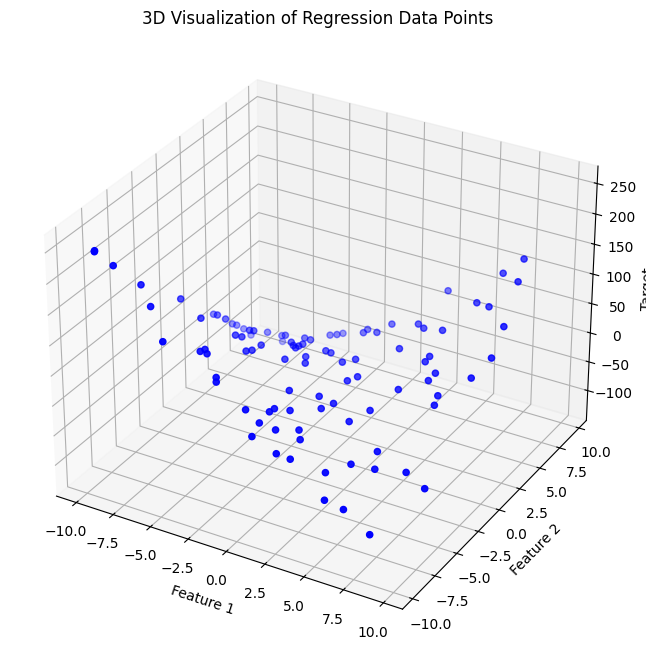

In [45]:
# Visualizing the dataset in a 3D scatter plot since we have two features and one target
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot of the features and target
ax.scatter(data_regression['Feature_1'], data_regression['Feature_2'],
data_regression['Target'], c='blue', marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# 5. The z-axis represents the label ( target variable 'Target')
ax.set_zlabel('Target')
plt.title('3D Visualization of Regression Data Points')
plt.show()

# 6. This is a regression problem because the goal is to predict
# a continuous numerical value ('Target'), 
# rather than classifying inputs into discrete categories.



In [46]:
# 8.Split the data into approximately 80% training and 20% testing sets
msk = np.random.rand(len(data_regression)) < 0.8
train = data_regression[msk]
test = data_regression[~msk]

# 9.Extract the train_x and train_y from the training set
train_x = np.array(train[[ 'Feature_1', 'Feature_2']])
train_y = np.array(train["Target"])

# 10.Extract the test_x and test_y from the testing set
test_x = np.array(test[['Feature_1', 'Feature_2']])
test_y = np.array(test["Target"])



In [47]:
# Multivariable Linear Regression model

# 11. Train a simple linear regression model based on the training set
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

# 12.  the hypothesis in my model is represented by:
# 𝒀= 𝜽_(𝟎 )+ 𝜽_(𝟏 ) 𝑿_𝟏 + 𝜽_(𝟐 )  ,
# where 𝒀 is the predicted value of the target variable, 
# 𝜽_(𝟎 ) is the constant (intercept) term,
# 𝑿_(𝟏 ) and 𝑿_𝟐 represent 'Feature_1' and 'Feature_2',
# 𝜽_(𝟏 ) and 𝜽_(𝟐 ) are the coefficient associated with 'Feature_1' and 'Feature_2', respectively. 

# 13. The cost function used in my model (implicitly through LinearRegression in scikit-learn) 
# is the Mean Squared Error (MSE).


# 14. What does a cost function do in a Linear Regression model?
# In a Linear Regression model, the cost function quantifies the difference between the predicted values 
# and the actual target values.

# 15. Print the coefficient and intercept
coeff_data = pd.DataFrame(regr.coef_, index=['Feature_1', 'Feature_2'], columns=["Coefficients"])
coeff_data.loc['Intercept'] = regr.intercept_
coeff_data

# 16.In a linear regression model,
# coefficients represent the slope of the regression line for each feature, 
# and the intercept represents the value of the target variable when all features are zero. 
# While in polynomial regression, 
# coefficients retain similar interpretations but account for higher-order relationships between features 
# and the target variable.


,Coefficients
Feature_1,0.662551
Feature_2,-3.433934
Intercept,16.844877


In [48]:
# 17.Test the model by calculating the r2_score (use the test set)
prediction = regr.predict(test_x)
R = r2_score(test_y , prediction)
print ("R² :",R)
rmse = np.sqrt(metrics.mean_squared_error(test_y,prediction))
print('RMSE: ', rmse)


R² : 0.10831126908722544
RMSE:  68.39137127799512


C:\Users\Robert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


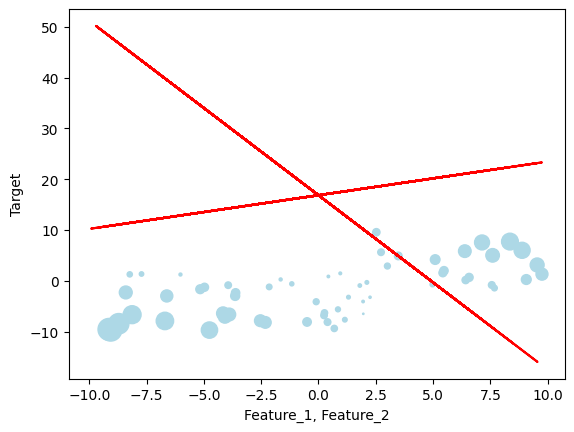

In [49]:
# 18. Plot the best-fit plane for the entire dataset

plt.scatter(data_regression['Feature_1'], data_regression['Feature_2'], data_regression['Target'], color='lightblue')
plt.plot(train_x, regr.coef_ * train_x + regr.intercept_, '-r')
plt.xlabel('Feature_1, Feature_2')
plt.ylabel('Target')
plt.savefig('Linear_Regression.png', dpi=300, transparent=True)

In [64]:

# Polynomial regression model


# 19. Simple linear regression assumes a linear relationship between variables, 
# represented by a straight line equation, 
# while polynomial regression allows for nonlinear relationships using higher-degree polynomial equations. 
# Polynomial regression is more flexible and can capture nonlinear patterns, 
# but it's prone to overfitting compared to simple linear regression.

# 22. Specify the degree of the polynomial equation
nb_degree = 2


# 23. The degree chosen for the polynomial features is 2 
# because it allows the model to capture quadratic relationships 
# between the features and the target variable without 
# introducing unnecessary complexity or risking overfitting.

polynomial_features = preprocessing.PolynomialFeatures(degree = nb_degree)

# 20. Transform the train_x to fit the polynomial feature
train_x_transformed = polynomial_features.fit_transform(train_x)

# 21. Train a polynomial regression model based on the generated datapoint with the training set
model = linear_model.LinearRegression()
model.fit(train_x_transformed, train_y)

# Predicting the model
test_x_transformed = polynomial_features.fit_transform(test_x)
prediction = model.predict(test_x_transformed)

# 24. Calculate the RMSE and R2 Score 
rmse = np.sqrt(metrics.mean_squared_error(test_y,prediction))
r2 = metrics.r2_score(test_y, prediction)

# 25. Print the Mean Square Error and R2 Score 
print('R2: ', r2)
print('RMSE: ', rmse)


# 26. We use the test set (not the train set) to calculate performance metrics 
# like RMSE, R2 score, and MSE because it ensures unbiased evaluation of 
# the model's generalization ability on unseen data, 
# avoiding overfitting and providing reliable estimates of real-world performance.



R2:  1.0
RMSE:  1.094674471036289e-13


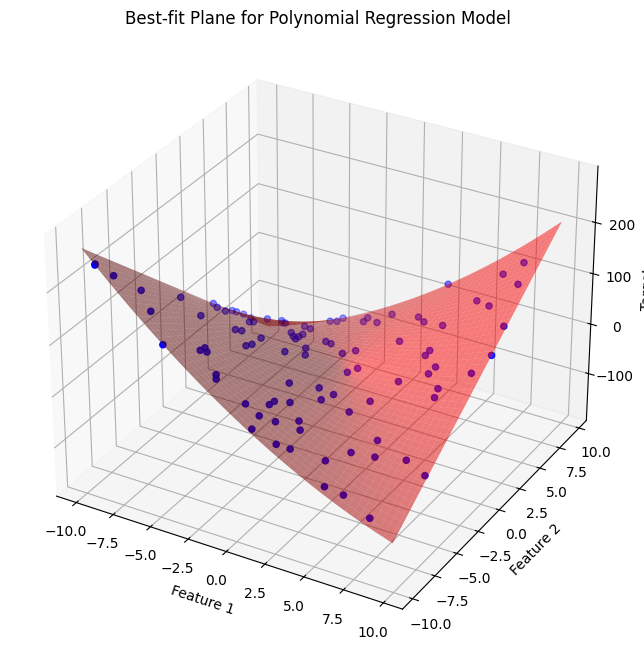

In [51]:
# 27. Plot the best-fit plane (3d)

# Define a range of values for features
feature_1_values = np.linspace(data_regression['Feature_1'].min(), data_regression['Feature_1'].max(), 100)
feature_2_values = np.linspace(data_regression['Feature_2'].min(), data_regression['Feature_2'].max(), 100)

# Create a meshgrid using feature values
feature_1_mesh, feature_2_mesh = np.meshgrid(feature_1_values, feature_2_values)

# Transform the meshgrid using polynomial features
transformed_mesh = polynomial_features.fit_transform(np.vstack([feature_1_mesh.ravel(), feature_2_mesh.ravel()]).T)

# Predict target values for transformed meshgrid
target_mesh = model.predict(transformed_mesh).reshape(feature_1_mesh.shape)

# Plot the original data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_regression['Feature_1'], data_regression['Feature_2'], data_regression['Target'], c='blue', marker='o', label='Data points')

# Plot the best-fit plane
ax.plot_surface(feature_1_mesh, feature_2_mesh, target_mesh, color='red', alpha=0.5, label='Best-fit plane')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title('Best-fit Plane for Polynomial Regression Model')

# Show plot
plt.show()


In [ ]:
# 28. There are 6 steps involved in training my polynomial regression models:

# (a). Data Preparation: Prepare dataset with features and the target.
# (b).Splitting the Data: Split the dataset into training and testing sets to evaluate the model's performance.
# (c).Feature Transformation: Transform the features into polynomial features to 
# capture nonlinear relationships between the features and the target variable.
# (d).Model Initialization: Initialize the polynomial regression model.
# (e).Model Training: Train the polynomial regression model using the transformed training features 
# and the corresponding target values.
# (f).Model Evaluation: Evaluate the trained model's performance using the testing set 
# to calculate metrics such as RMSE, R2 score, and MSE.

# 29. Compare the two models:
# Multivariable Linear Regression has a lower R2 score(0.10831126908722544) and a higher RMSE(68.39137127799512),
# while Polynomial Regression has a higher R2 score(1.0）and a lower RMSE(1.094674471036289e-13).

# I THINK because Multivariable Linear Regression typically assumes a linear relationship between features and the target variable. 
# When applied to a dataset with non-linear relationships, it may struggle to capture the complexity of the underlying patterns, 
# resulting in a lower R2 score and higher RMSE.

# On the other hand, Polynomial Regression can capture non-linear relationships by introducing polynomial terms,
# This flexibility often leads to higher R2 scores and lower RMSE compared to Multivariable Linear Regression 
# when the underlying relationship is non-linear, as observed in this case.

# Therefore, Polynomial Regression performs better due to its ability to capture the non-linear nature of the data.

# 30. If my model performs great on the training data but generalises poorly to new instances, 
# it is experiencing overfitting.